# Ford Go-Bike Data Exploraitons
## by Mehmet Cenk Bursali


## Preliminary Wrangling

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Dataset is loaded and its properties are described through the questions below.

In [2]:
df = pd.read_csv("ford_go_bike_trip_data.csv")

In [3]:
df.shape

(183412, 16)

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
print(df['start_station_id'].nunique(), df['start_station_name'].nunique())
print(df['end_station_id'].nunique(), df['end_station_name'].nunique())

329 329
329 329


### What is the structure of your dataset?

There are 183412 transactions in the dataset and their 16 features. 9 of them are numerical and the remaining 7 is string. However, some of string datatypes should be category and time data.      

### What is/are the main feature(s) of interest in your dataset?

Duration of the rents is the main feature of interest in my dataset because duration is correlated directly with income. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect people prefers to use this service most in rush-hours because they need bike the most in this period. 

In weekdays bikes can be demanded more compared to weekend.

I think the number of users are higher for younger ones normally but I can not predict especically which age group would like to ride bike most. 

## Data Wrangling

### Data Assessing

- Columns to be removed: `start_station_id`, `end_station_id`, `bike_id`
- Missing values: `start_station_name`, `end_station_name`, `member-birth-year` and `member-gender`
- Inconstant values: `duration_sec`
- New column for analysis: `member_age`,`weekday`,`hour`,`distance`

### Data Cleaning

In [8]:
df1 = df.copy()

#### Columns keeping similar information

##### Define

`start_station_id`-`start_station_name` and `end_station_id`-`end_station_name` column pairs have similar data. They keep id and name infos of stations. Only one of them is enough for confirming station. Therefore, I will drop `start_station_id` and `end_station_id` columns. I will drop `bike_id` column also because it is not used. 

##### Code

In [9]:
df1 = df1.drop(['start_station_id', 'end_station_id', 'bike_id'], axis=1)

##### Test

In [10]:
print(df.shape[1])
print(df1.shape[1])

16
13


#### Missing values

##### Define 

`start_station_name`, `end_station_name`, `member-birth-year` and `member-gender` columns have missing values. Even if we drop rows with missing values, we still have over 170000 transactions. This is enough data for analysis. For this reason, I will drop rows that contain missing values.

##### Code 

In [11]:
df1 = df1[df1['start_station_name'].notnull()]
df1 = df1[df1['member_birth_year'].notnull()]

##### Test

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_name       174952 non-null  object 
 4   start_station_latitude   174952 non-null  float64
 5   start_station_longitude  174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   end_station_latitude     174952 non-null  float64
 8   end_station_longitude    174952 non-null  float64
 9   user_type                174952 non-null  object 
 10  member_birth_year        174952 non-null  float64
 11  member_gender            174952 non-null  object 
 12  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 18.7+ MB


#### New columns for analysis

##### Define

A new column keeping ages of members would be useful. I will create a new column called as `member_age`, `age_group`, `day_in_week`, `weekday_or_not`, `distance`, `day_in_month` and `day_period`.

##### Code

In [13]:
# Dataset is created in 2019
df1['member_age'] = 2019-df1['member_birth_year']

# Hour info is drawn by `start_time` column
df1['hour'] = df1['start_time'].str[11:13].astype('category')

In [14]:
# df1['member_age']
bin_edges = [17.5,30.5,45.5,65.5,90.5]
df1['age_group'] = pd.cut(df1['member_age'], bin_edges, labels=['low', 'low_med', "high-mid", 'high'])


order=['low', 'low_med', "high-mid", 'high']
age_group = pd.api.types.CategoricalDtype(categories=order, ordered=True)
df1['age_group'] = df1['age_group'].astype(age_group)

In [15]:
def day_in_week(x):
    if x%7 == 4:
        return 'monday'
    elif x%7 == 5:
        return 'tuesday'
    elif x%7 == 6:
        return 'wednesday'
    elif x%7 == 0:
        return 'thursday'
    elif x%7 == 1:
        return 'friday'
    elif x%7 == 2:
        return 'saturday'
    elif x%7 == 3: 
        return 'sunday'

df1['day_in_week'] = df1['start_time'].astype('str').str[8:10].astype('int').apply(day_in_week)

order = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
day_in_week = pd.api.types.CategoricalDtype(categories=order, ordered=True)
df1['day_in_week'] = df1['day_in_week'].astype(day_in_week)

In [16]:
def weekday_or_not(x):
    if x%7 in [2,3]:
        return 'weekend'
    else: 
        return 'weekday'

df1['workday_or_not'] = df1['start_time'].astype('str').str[8:10].astype('int').apply(weekday_or_not)

In [17]:
# air distance between start end end stations
# distance between two longitudes is 88.1 km (approximately)
# distance between two latitudes is 111 km
x_dist = (df1['start_station_longitude']-df1['end_station_longitude'])*88.1
y_dist = (df1['start_station_latitude']-df1['end_station_latitude'])*111

df1['distance'] = np.sqrt(np.power(x_dist,2)+np.power(y_dist,2))*1000

In [18]:
df1['day_in_month'] = df1['start_time'].str[8:10]

In [19]:
df1['day_period'] = df1['hour'].astype('str').replace(['21','22','23','00','01','02','03','04','05'],'night')
df1['day_period'] = df1['day_period'].astype('str').replace(['06','07','08','09','10'],'morning')
df1['day_period'] = df1['day_period'].astype('str').replace(['11','12','13','14','15'],'afternoon')
df1['day_period'] = df1['day_period'].astype('str').replace(['16','17','18','19','20'],'evening')

order=['morning','afternoon','evening','night']
day_per = pd.api.types.CategoricalDtype(categories=order, ordered=True)
df1['day_period'] = df1['day_period'].astype(day_per)

##### Test

In [20]:
print(df1['member_age'].value_counts().sort_index().index)
print(df1['age_group'].unique())
print(df1['hour'].nunique())
print(df1['day_in_week'].unique())
print(df1['workday_or_not'].unique())
print(df1['day_in_month'].nunique())
print(df1['day_period'].unique())

Float64Index([ 18.0,  19.0,  20.0,  21.0,  22.0,  23.0,  24.0,  25.0,  26.0,
               27.0,  28.0,  29.0,  30.0,  31.0,  32.0,  33.0,  34.0,  35.0,
               36.0,  37.0,  38.0,  39.0,  40.0,  41.0,  42.0,  43.0,  44.0,
               45.0,  46.0,  47.0,  48.0,  49.0,  50.0,  51.0,  52.0,  53.0,
               54.0,  55.0,  56.0,  57.0,  58.0,  59.0,  60.0,  61.0,  62.0,
               63.0,  64.0,  65.0,  66.0,  67.0,  68.0,  69.0,  70.0,  71.0,
               72.0,  73.0,  74.0,  75.0,  76.0,  77.0,  78.0,  80.0,  81.0,
               85.0,  86.0,  88.0,  89.0,  91.0,  92.0,  99.0, 109.0, 117.0,
              118.0, 119.0, 141.0],
             dtype='float64')
[low_med, high-mid, low, high, NaN]
Categories (4, object): [low < low_med < high-mid < high]
24
[thursday, wednesday, tuesday, monday, sunday, saturday, friday]
Categories (7, object): [monday < tuesday < wednesday < thursday < friday < saturday < sunday]
['weekday' 'weekend']
28
[evening, afternoon, night, morning]

## Univariate Exploration


I will start by looking at distribution of rent period.

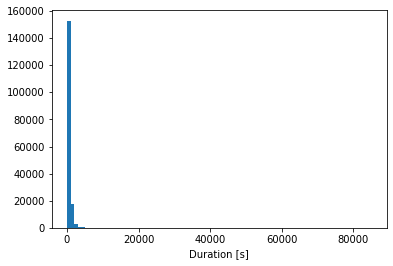

In [21]:
bins = np.arange(df1['duration_sec'].min(), df1['duration_sec'].max()+1000, 1000)

plt.hist(data=df1.query('duration_sec<5000'), x='duration_sec', bins=bins);
plt.xlabel('Duration [s]');

The distribution of rent period is right-skewed and it has a long tail so it would be better using logarithmic scale. 

Text(0.5, 0, 'Duration [s]')

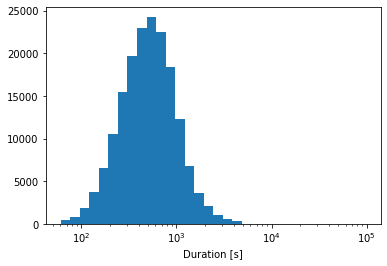

In [22]:
bins = 10**np.arange(np.log10(df1['duration_sec']).min(), np.log10(df1['duration_sec']).max()+.1, .1)
plt.hist(data=df1.query('duration_sec<5000'), x='duration_sec', bins=bins)
plt.xscale('log')
plt.xlabel('Duration [s]')

The number of rents higher than 5000 secs are very low. I will plot distribution of duration lower than 5000.

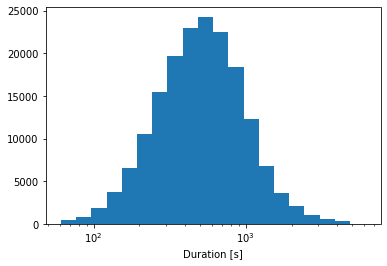

In [23]:
bins = 10**np.arange(np.log10(df1['duration_sec']).min(), np.log10(5000).max()+.1, .1)

plt.hist(data=df1.query('duration_sec<5000'), x='duration_sec', bins=bins)
plt.xscale('log')
plt.xlabel('Duration [s]');

Bikes are rented for a short time mostly. The number of long rents period is very low. Bicycles are rented for 500-600 minutes at most. There are some outliers in this column. I will remove them. 

In [24]:
df1 = df1.query('duration_sec<5000')

I will see age distribution of customers now. 

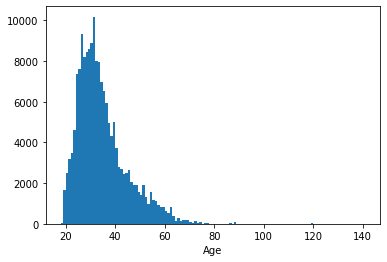

In [25]:
bins = np.arange(df1['member_age'].min(), df1['member_age'].max()+1,1)

plt.hist(data=df1, x='member_age', bins=bins);
plt.xlabel('Age');

This plot is also right skewed but using logarithmic scale for ages does not make sense.

It is very rare for a person to live to the age of 140. It is almost impossible for this person to ride a bicycle. With an optimistic estimate, suppose that the oldest person riding a bicycle is 90 years old.

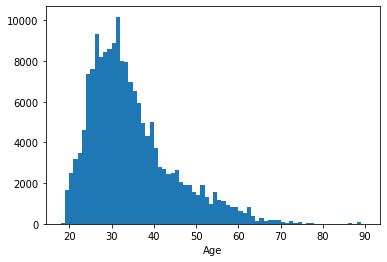

In [26]:
bins = np.arange(df1['member_age'].min(), 90+1,1)

plt.hist(data=df1, x='member_age', bins=bins);
plt.xlabel('Age');

As expected, there are more young users. At ages of 26, 31, and 39, there are peak points compared to the general distribution. Again there are some outliers in this column. They will be also removed.

In [27]:
df1 = df1.query('member_age<=90')

I will plot frequency of start hour. 

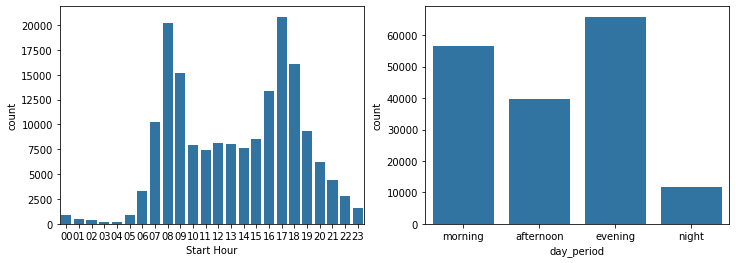

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(df1['hour'], color=base_color)
plt.xlabel('Start Hour')
plt.subplot(122)
sb.countplot(df1['day_period'], color=base_color)

As expected, demand for bikes at rush-hours increases. And least preferred hours are at night.

Now, I will examine when users leave bikes to stations. 

Text(0.5, 0, 'End Hour')

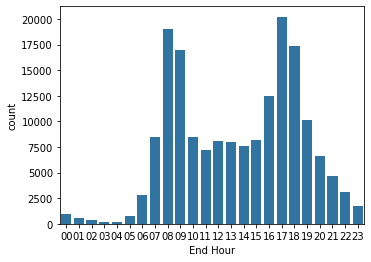

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sb.countplot(df1['end_time'].astype('str').str[11:13], color=base_color)
plt.xlabel('End Hour')

Start and end hours of rents are very similar. It can be inferred that most of the users rent bikes for a short time. 

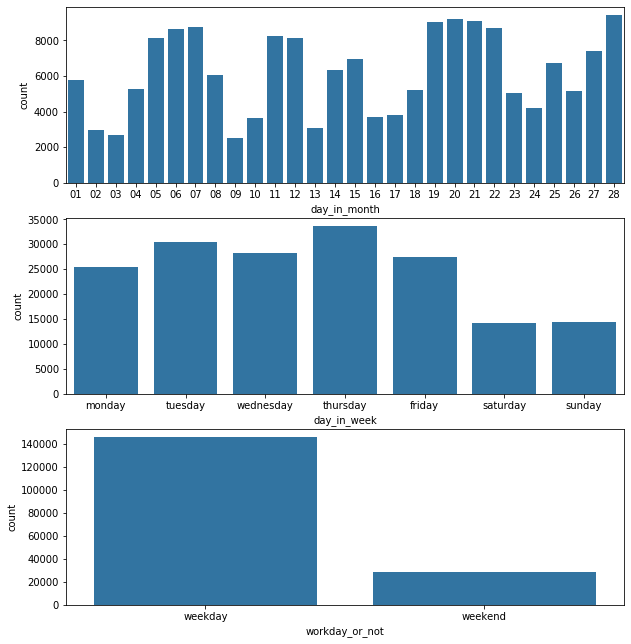

In [30]:
plt.figure(figsize=(10,11))
plt.subplot(311)
sb.countplot(df1['day_in_month'], color=base_color)
plt.subplot(312)
sb.countplot(df1['day_in_week'], color=base_color)
plt.subplot(313)
sb.countplot(df1['workday_or_not'], color=base_color)

It seems that bikes are rented more in weekdays. Thursday is the busiest day. There is no clear reason for now why it is. 

Finally, `user_type`, `member_gender`, `bike_share_for_all_trip` columns are investigated. 

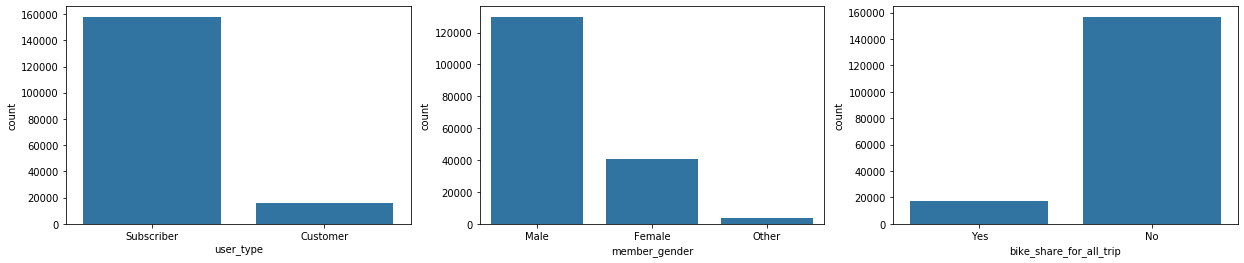

In [31]:
plt.figure(figsize=(21,4))

plt.subplot(131)
sb.countplot(data=df1, x='user_type', color=base_color)
plt.subplot(132)
sb.countplot(data=df1, x='member_gender', color=base_color)
plt.subplot(133)
sb.countplot(data=df1, x='bike_share_for_all_trip', color=base_color)

The number of members defining themselves in under 'other' gender option is very low compared to male and females. Also, other gender type will not be used in analysis. Therefore, it is removed from dataset.  

In [32]:
df1 = df1.query('member_gender in ["Female", "Male"]')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration plot was right-skewed and has a long tail so a log transformation was required. After log scale, the data looked unimodal with the peak between  500 and 600.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Age plot did not make sense because it goes to 141 years old. I limited it at 90 and remove rows where age higher than 90.

In the duration plot, higher than 5000s there were very few observations. The ones higher than this limit were removed. 

## Bivariate Exploration

Stations are clustered in three regions mainly. Two of regions are close each others while one in south-east is far away from others. 

I want to look at the corelations between two numerical variables (`duration` and `distance`)

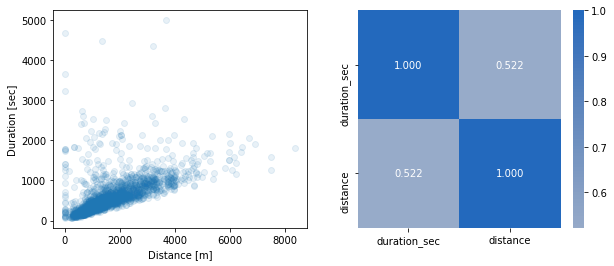

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(data=df1.sample(2000), x='distance', y='duration_sec', alpha=.1)
plt.xlabel('Distance [m]')
plt.ylabel('Duration [sec]')
plt.subplot(122)
sb.heatmap(df1[['duration_sec','distance']].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)

I would like to know whether there is a correlation between `age` and `duration`.

(0, 750)

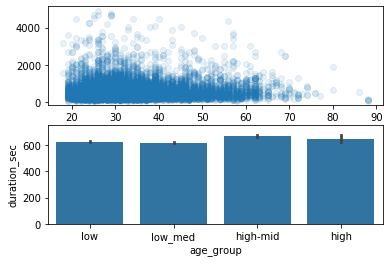

In [34]:
plt.subplot(211)
plt.scatter(data=df1.sample(10000), x='member_age', y='duration_sec', alpha=.1)
plt.subplot(212)
sb.barplot(data=df1, x='age_group', y='duration_sec', color=base_color)
plt.ylim(0,750)

I will take a look at how duration changes with hour. 

(0, 1000)

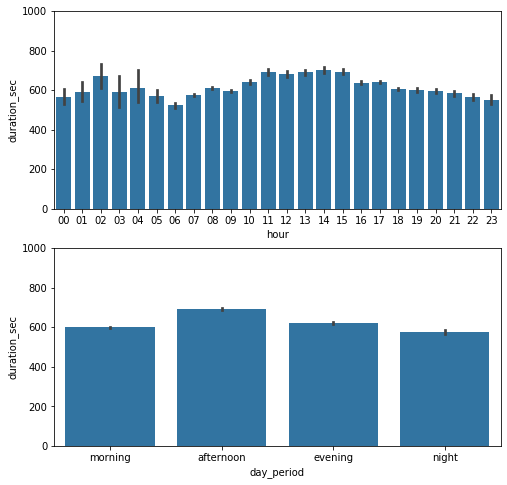

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(211)
sb.barplot(data=df1, x='hour', y='duration_sec', color=base_color)
plt.ylim(0,1000)
plt.subplot(212)
sb.barplot(data=df1, x='day_period', y='duration_sec', color=base_color)
plt.ylim(0,1000)

I will explore duration vs. day relationship.

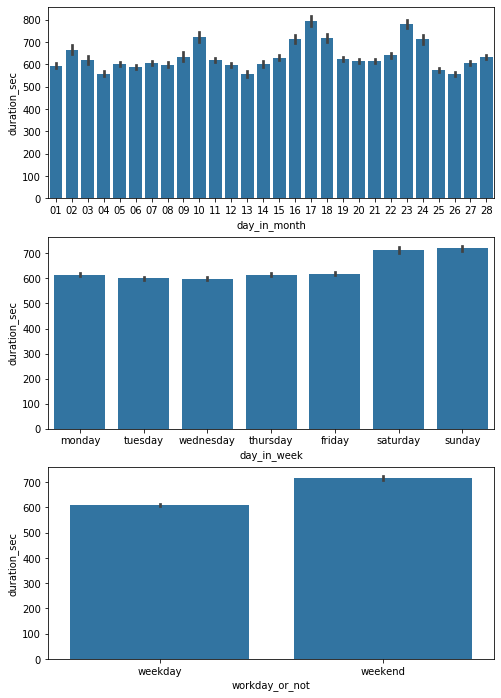

In [36]:
plt.figure(figsize=(8,12))
plt.subplot(311)
sb.barplot(data=df1, x='day_in_month', y='duration_sec', color=base_color)
plt.subplot(312)
sb.barplot(data=df1, x='day_in_week', y='duration_sec', color=base_color)
plt.subplot(313)
sb.barplot(data=df1, x='workday_or_not', y='duration_sec', color=base_color)

Relationship of other features with duration is here.

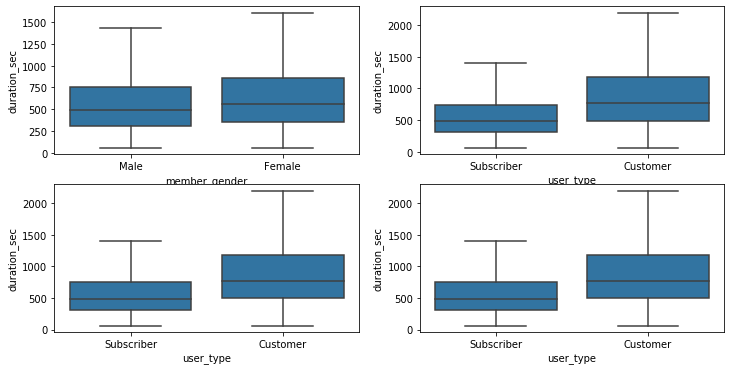

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sb.boxplot(data=df1, x='member_gender', y='duration_sec', color=base_color, showfliers=False)
plt.subplot(222)
sb.boxplot(data=df1, x='user_type', y='duration_sec', color=base_color, showfliers=False)
plt.subplot(223)
sb.boxplot(data=df1, x='user_type', y='duration_sec', color=base_color, showfliers=False)
plt.subplot(224)
sb.boxplot(data=df1, x='user_type', y='duration_sec', color=base_color, showfliers=False)

Let's see where bike stations locate.

Text(0, 0.5, 'latitude')

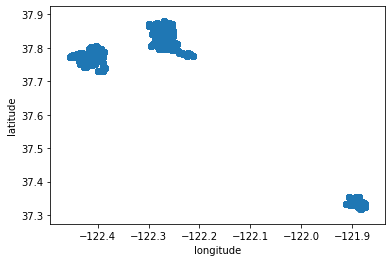

In [38]:
# Locations of bike stations
plt.scatter(data=df1, x='start_station_longitude', y='start_station_latitude');
plt.xlabel('longitude')
plt.ylabel('latitude')

In [39]:
bin_edges = [-122.5, -122.35, -122, -121.8]
df1['regions'] = pd.cut(df1['start_station_longitude'], bin_edges, labels=['west', 'middle', "east"])

Let's look how cycling during the day changes according to weekend and week.

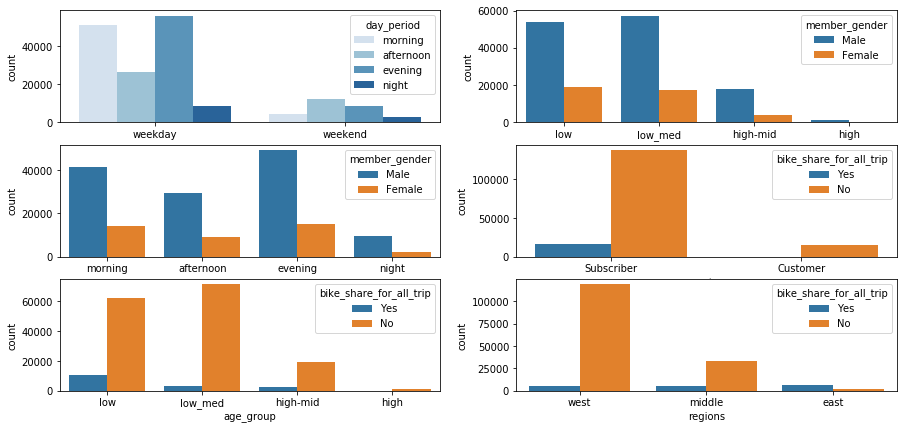

In [40]:
plt.figure(figsize=(15,7))
plt.subplot(321)
sb.countplot(data=df1, x='workday_or_not', hue='day_period', palette = 'Blues')
plt.subplot(322)
sb.countplot(data = df1, x = 'age_group', hue = 'member_gender')
plt.subplot(323)
sb.countplot(data = df1, x = 'day_period', hue = 'member_gender')
plt.subplot(324)
sb.countplot(data = df1, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.subplot(325)
sb.countplot(data = df1, x = 'age_group', hue = 'bike_share_for_all_trip')
plt.subplot(326)
sb.countplot(data = df1, x = 'regions', hue = 'bike_share_for_all_trip')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is positive correlation between duration and distance between start and end stations.

Bicycles are rented longer at noon and in weekend.

Customers and female users rent longer than subscribers and male users.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Stations are clustered in three regions mainly. In the west region, people enrolled in "Bike Share for All" program are more, while vice versa in east middle regions.

There is no customer enrolled in "Bike Share for All" program. Being a subscriber can be necessary for joining the program. 

In weekdays, rush-hours are busier than noon but noon is the busiest period in weekends. 

Young people are more inclined to participate in "Bike Share for All" program 

## Multivariate Exploration

I will explore relationship of duration and day period with other features. 

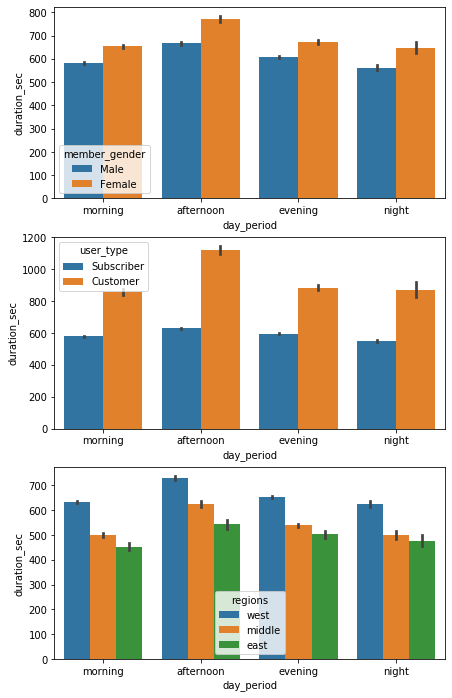

In [41]:
plt.figure(figsize=(7,12))
plt.subplot(311)
sb.barplot(data=df1, x='day_period', y='duration_sec', hue='member_gender')
plt.subplot(312)
sb.barplot(data=df1, x='day_period', y='duration_sec', hue='user_type')
plt.subplot(313)
sb.barplot(data=df1, x='day_period', y='duration_sec', hue='regions')

I will explore relationship of duration and weekdays with other features.

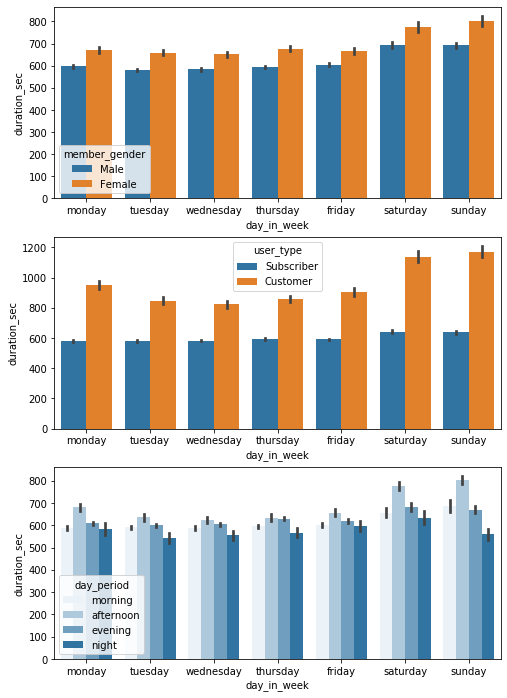

In [42]:
plt.figure(figsize=(8,12))
plt.subplot(311)
sb.barplot(data=df1, x='day_in_week', y='duration_sec', hue='member_gender')
plt.subplot(312)
sb.barplot(data=df1, x='day_in_week', y='duration_sec', hue='user_type')
plt.subplot(313)
sb.barplot(data=df1, x='day_in_week', y='duration_sec', hue='day_period', color=base_color)

Let's look at the busiest time of the week.

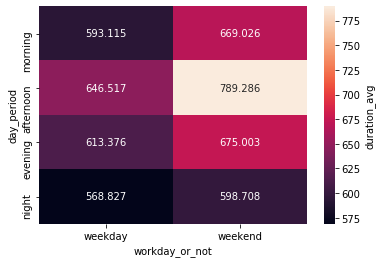

In [43]:
cat_means = df1.groupby(['workday_or_not', 'day_period']).mean()['duration_sec']
cat_means = cat_means.reset_index(name='duration_avg')
cat_means = cat_means.pivot(index='day_period', columns='workday_or_not', values='duration_avg')

sb.heatmap(cat_means, annot=True, fmt='.3f', cbar_kws={'label':'duration_avg'})

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

At noon, customers cycle nearly twice as long as subscribers

Bikes are rented for the longest time at noon on the weekends.

### Were there any interesting or surprising interactions between features?

No interaction between features was detected.